# Figures for the Tracking experiment results

First of all, let's reveiew what data do we have. we have:
- Projector image brightness
- trial number
- time


Here is a list of figures needed for demonstrating (and interpreting) the tracking experiment results:

#### For single session
- trial time vs. brightness
- trial time vs. brightness shifted
- distribution of brightness intensity for the whole session
- Trial vs. latency
- Latency distribution

#### Comparing multiple sessions
- Latency distribution of Display for different parameters (resolution, or FR)
- Average brightness trace for different parameters



In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import vrlatency as vrl

In [2]:
data_path = "../../data/Display"

In [3]:
os.chdir(data_path)

In [4]:
filenames = []
for filename in glob.glob("*.csv"):
    print(filename)
    filenames.append(filename)

display_20180830_115317.csv
display_20180830_123133.csv
display_20180830_123445.csv
display_20180830_124007.csv
display_20180830_124242.csv
display_20180830_175009.csv
display_20180830_175220.csv
display_20180830_175249.csv
display_20180830_175922.csv
display_20180830_175944.csv
display_20180830_175957.csv
display_20180830_180145.csv
display_20180830_180216.csv
display_20180830_180339.csv
display_20180830_180657.csv
display_20180830_181301.csv
display_20180830_181639.csv
display_20180830_182344.csv
display_20180830_182735.csv
display_20180830_183236.csv
display_20180830_183706.csv
display_20180830_184108.csv
display_20180830_184346.csv
display_20180830_184633.csv
display_20180830_184938.csv
display_20180830_185858.csv
display_20180830_190230.csv
display_20180830_191215.csv
display_20181003_185323.csv


In [5]:
filename = filenames[-1]
session_name = filename.split('.')[0]
dfd = vrl.read_csv(filename)

In [6]:
dfd.head()

,Trial,Time,SensorBrightness
0,2,128,0
1,2,168,0
2,2,204,0
3,2,244,0
4,2,280,0


In [7]:
dfd_transformed = vrl.analysis.transform_display_df(dfd, session=session_name)
df_clustered = dfd_transformed[dfd_transformed.Cluster == 0].copy()
df_shifted = vrl.analysis.shift_by_sse(df_clustered)

In [8]:
df_shifted.tail()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc,Cluster
1199995,display_20181003_185323,1001,1195,45.624,45.496,387,13.56,31.936,0.75,0.0
1199996,display_20181003_185323,1001,1196,45.660,45.532,387,13.56,31.972,0.75,0.0
1199997,display_20181003_185323,1001,1197,45.700,45.572,64,13.56,32.012,0.75,0.0
1199998,display_20181003_185323,1001,1198,45.736,45.608,3,13.56,32.048,0.75,0.0
1199999,display_20181003_185323,1001,1199,45.776,45.648,17,13.56,32.088,0.75,0.0


---

In [9]:
plt.rcParams.update({'font.size': 20})

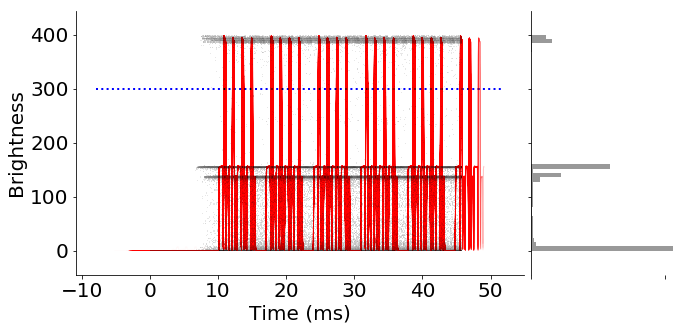

In [12]:
dd = df_shifted.copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

mean_latency = dd.groupby('Trial').DisplayLatency.mean().mean()
vrl.analysis.plot_display_brightness_over_session(trial_time=dd['TrialTime'], sensor_brightness=dd['SensorBrightness'],
                                                  nsamples_per_trial=dd.groupby('Trial')['DisplayLatency'].agg(len).min(),
                                                  ax=ax1)
vrl.analysis.plot_shifted_brightness_over_session(time=dd['TrialTransitionTime'], 
                                                  sensor_brightness=dd['SensorBrightness'],
                                                  trial_idx = dd['Trial'], shift_by=mean_latency, 
                                                  ax=ax1)
vrl.analysis.plot_brightness_threshold(sensor_brightness=dd['SensorBrightness'], thresh=dd['ThreshPerc'].values[0], ax=ax1)


vrl.analysis.plot_display_brightness_distribution(sensor_brightness=dd['SensorBrightness'].values, ax=ax2)
ax1.set_ylim(*ax2.get_ylim())
ax2.set(xticklabels='', yticklabels='')
ax1.set(xlabel='Time (ms)', ylabel='Brightness');

sns.despine(top=True, ax=ax1)
sns.despine(top=True, bottom=True, ax=ax2)

fig.tight_layout(w_pad=0)

## Trials versus latency (with distribution)

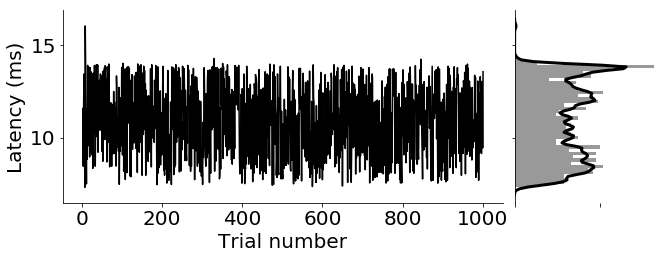

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)
vrl.analysis.plot_tracking_latency_over_session(dd.Trial, dd.DisplayLatency, ax=ax1)
ax1.set(xlabel='Trial number', ylabel='Latency (ms)')
sns.despine(top=True, ax=ax1)

vrl.analysis.plot_tracking_latency_distribution(dd['DisplayLatency'].values, ax=ax2)
sns.despine(top=True, bottom=True, ax=ax2)
ax2.set(xticklabels='')
fig.tight_layout(w_pad=0)

## Latency distribution alone

Enables comparison between different display latency measurements

In [16]:
latencies = dfd_transformed['DisplayLatency'].values

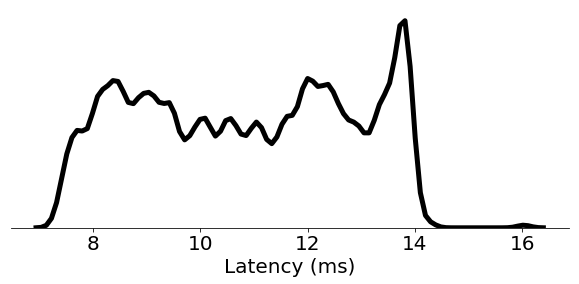

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.despine(left=True)

data = latencies[np.isnan(latencies) == False]
sns.distplot(data, hist=False, color="k", kde_kws={"linewidth": 5, "alpha": 1}, ax=ax);
# ax.set(xlabel='Latency (ms)', ylabel='Frequency (normalized)');
ax.set(xlabel='Latency (ms)', ylabel='');
plt.yticks([]);